In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax, ReLU, Module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784') # 손글씨 숫자 이미지

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist['data'].shape

(70000, 784)

In [6]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
mnist['data'].values[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [19]:
x_datad = (mnist['data']/255).values ## 정규화 흑백 색상이므로 255로 나누면 0~1사이 값이 됨 --> numpy()
x_data = x_datad.reshape(-1, 1, 28, 28) ## 4차원으로 변환
y_data = pd.get_dummies(mnist['target']).values # 0~9를 one-hot encoding

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.3, stratify=y_data)

In [21]:
x_train[0].shape

(1, 28, 28)

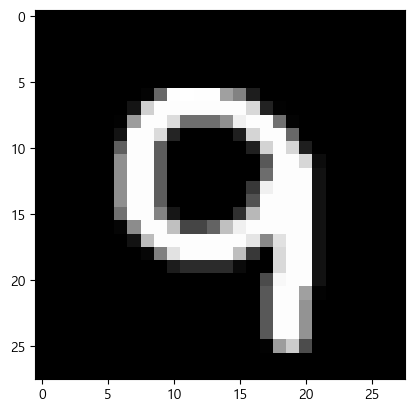

In [22]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

In [23]:
x = torch.FloatTensor(x_train)
y = torch.FloatTensor(y_train)

In [24]:
print(x.shape)
print(y.shape)

torch.Size([21000, 1, 28, 28])
torch.Size([21000, 10])


In [25]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # in_channels: input 이미지의 color depth (흑백, 컬리, 등)
        # out_channels: 필터의 수 3개
        # kernel_size: 필터의 크기 5x5
        # stirde: 필터 이동 크기
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3,
                              kernel_size=5, stride=1)
#         self.relu1 = nn.ReLU() <= 이번에는 forward에서 함
        # 위 out_channels과 아래 in_channels 맞춰줌
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=10,
                              kernel_size=5, stride=1)
#         self.relu1 = nn.ReLU() <= 이번에는 forward에서 함
        # kernel_size: 필터의 크기
        # stride: 필터 이동 크기 (default는 kernel_size를 따름)
        self.max1 = nn.MaxPool2d(kernel_size=2) # 여기서는 stride=2가 됨

# deep
        self.fc1 = nn.Linear(10*10*10, 50) # 10*10*10은 2차원을 1차원으로 펴주는 효과
        # ReLU
        self.fc2 = nn.Linear(50, 10)
        self.smax = nn.Softmax(dim=1)
    
    def forward(self, x):
        
        x = F.relu( self.conv1(x) )                
        x = F.relu( self.conv2(x) )
        x = F.relu( self.max1(x) )
        print('max1 연산후', x.shape) # c x w x h c컬러Depth w행 h열 
        ## fully connected ==> matrix
        x = x.view(-1, 10*10*10)  # x.reshape(-1, 10*10*10)도 같음             
        
        x = F.relu( self.fc1(x) )
        x = self.fc2(x)
        x = self.smax(x)
        
        return x       
        

In [28]:
model = CNN()
model(x)

max1 연산후 torch.Size([21000, 10, 10, 10])


tensor([[0.1081, 0.0877, 0.1069,  ..., 0.0912, 0.0885, 0.1118],
        [0.1080, 0.0879, 0.1072,  ..., 0.0906, 0.0900, 0.1110],
        [0.1080, 0.0871, 0.1066,  ..., 0.0910, 0.0896, 0.1126],
        ...,
        [0.1090, 0.0873, 0.1080,  ..., 0.0910, 0.0899, 0.1120],
        [0.1080, 0.0873, 0.1081,  ..., 0.0915, 0.0894, 0.1108],
        [0.1084, 0.0869, 0.1074,  ..., 0.0913, 0.0881, 0.1124]],
       grad_fn=<SoftmaxBackward0>)

In [29]:
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam( model.parameters(), lr=0.01)

hist = []
for step in range(100):
    optimizer.zero_grad()
    hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print('=====================')
    rdata = y.argmax(dim=1).numpy()
    pred = hx.argmax(dim=1).numpy()
    print('정확도',accuracy_score(rdata, pred))
    hist.append(cost.item())

max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.09823809523809524
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.3637142857142857
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.30033333333333334
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.3119047619047619
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.4129047619047619
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.5101904761904762
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.49338095238095236
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.5151428571428571
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.5414285714285715
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.5805238095238096
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.537047619047619
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.5779047619047619
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.6045238095238096
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.6025238095238096
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.6206190476190476
max1 연산후 torch.Size([21000, 10, 10, 10

max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.8785238095238095
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.8768095238095238
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.8776190476190476
max1 연산후 torch.Size([21000, 10, 10, 10])
정확도 0.8791428571428571


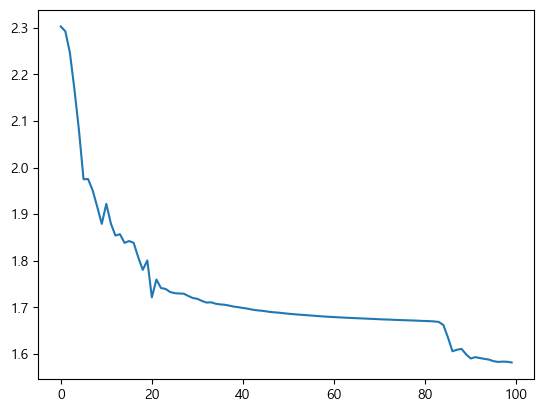

In [30]:
plt.plot(hist)
plt.show()